In [2]:
%cd ..

/home/pauline/Dokumente/Delab_Projekt/delab


In [3]:
import pandas as pd

In [4]:
import os
import sys
module_path = "/home/pauline/Dokumente/Delab_Projekt/delab-trees"
if module_path not in sys.path:
    sys.path.append(module_path)

In [5]:
from delab_trees.delab_tree import DelabTree



d = {'tree_id': [1] * 4,
     'post_id': [1, 2, 3, 4],
     'parent_id': [None, 1, 2, 1],
     'author_id': ["james", "mark", "steven", "john"],
     'text': ["I am James", "I am Mark", " I am Steven", "I am John"],
     "created_at": [pd.Timestamp('2017-01-01T01'),
                    pd.Timestamp('2017-01-01T02'),
                    pd.Timestamp('2017-01-01T03'),
                    pd.Timestamp('2017-01-01T04')]}

df = pd.DataFrame(data=d)

var = DelabTree(df)
print(df.head())
var.root_dominance()
# dir(DelabTree)

2023-03-30 10:39:20.005346: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-30 10:39:20.197218: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-30 10:39:20.197230: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-30 10:39:21.007860: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

   tree_id  post_id  parent_id author_id          text          created_at
0        1        1        NaN     james    I am James 2017-01-01 01:00:00
1        1        2        1.0      mark     I am Mark 2017-01-01 02:00:00
2        1        3        2.0    steven   I am Steven 2017-01-01 03:00:00
3        1        4        1.0      john     I am John 2017-01-01 04:00:00


0.25

In [15]:
import networkx as nx

In [53]:
from util.sql_switch import get_query_native
from delab_trees.main import TreeManager
import delab_trees.util 

authors_tweets = get_query_native(
    "SELECT ta.id as a_id, created_at, t.tn_parent_id as parent_id, conversation_id as tree_id, screen_name as author_id , is_climate_author, climate_author_type, t.twitter_id as post_id FROM delab_tweet t, delab_tweetauthor ta WHERE t.author_id=ta.twitter_id")
clauthors_tweets = authors_tweets.loc[authors_tweets['is_climate_author']== True]

#tweet_trees = DelabTree(authors_tweets)
#tweet_trees_graph = tweet_trees.reply_graph
#tweet_trees_graph
#tweet_trees_df = tweet_trees.df
#tweet_trees_df
#climate_tweet_trees = DelabTree(clauthors_tweets)
#climate_tweet_trees_df = climate_tweet_trees.df
#climate_tweet_trees_df

tree_manager = TreeManager(authors_tweets)
tree_manager_df = tree_manager.df
all_trees = tree_manager.trees
tree_manager_df
    

using postgres


/home/pauline/Dokumente/Delab_Projekt/delab/venv/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,a_id,created_at,parent_id,tree_id,author_id,is_climate_author,climate_author_type,post_id
0,422751,2022-12-27 09:56:22+00:00,1.607240e+18,1607239544968978436,Carlinisjesus,False,none,1607676757418860549
1,432951,2022-12-27 10:37:17+00:00,1.607240e+18,1607239544968978436,mySolutionLtd,False,none,1607687052841058304
2,215345,2022-06-14 05:55:01+00:00,1.536427e+18,1536426690435551233,Juper_Pb,False,none,1536587996669038593
3,330168,2022-12-15 01:11:03+00:00,1.603193e+18,1603181423787380737,tonyydublin,False,none,1603195899349450752
4,111287,2022-12-15 01:02:02+00:00,1.603192e+18,1603181423787380737,72Metzger,False,none,1603193631858384898
...,...,...,...,...,...,...,...,...
1060014,435808,2022-12-27 04:34:36+00:00,1.607240e+18,1607239544968978436,DVA0266,False,none,1607595781078253570
1060015,435808,2022-12-27 04:37:17+00:00,1.607240e+18,1607239544968978436,DVA0266,False,none,1607596457040793601
1060016,33539,2022-12-27 05:25:04+00:00,1.607240e+18,1607239544968978436,DorothyChart14,False,none,1607608482882260994
1060017,319715,2022-12-27 08:25:43+00:00,1.607240e+18,1607239544968978436,VaidasJSP,False,none,1607653943777320960


In [51]:
from delab_trees.util import get_root
columns = ["author_id", "conversation_id", "screen_name", "is_climate_author", "climate_author_type", "depth", "branching_factor", "centrality", "baseline_vision", "n_posts", "root_dominance", "total_counts"]
climate_df = pd.DataFrame(columns=columns)
#climate_df = climate_df.append(tree_manager_df)
#climate_df.head()


for conversation_id in all_trees:
    this_tree = all_trees[conversation_id]
    tree_df = tree_manager_df.loc[tree_manager_df['tree_id']== conversation_id]
    root_df = tree_df.loc[tree_df['parent_id'].isna()]
    if len(root_df) > 1:
        print("Disfunktional Tree") #noch zu error verarbeiten
        continue
    cl_df = pd.DataFrame()    
    cl_df['branching_factor'] = this_tree.average_branching_factor()
    cl_df['total_counts'] = this_tree.total_number_of_posts()
    cl_df['root_dominance'] = this_tree.root_dominance()
    cl_df['n_posts'] = root_dominance*total_counts
    metrics = this_tree.get_author_metrics()
    cl_df['baseline_vision'] = metrics[]
      
    
    
       

AttributeError: 'DiGraph' object has no attribute 'root'

In [7]:
from util.sql_switch import get_query_native

authors_tweets = get_query_native(
    "SELECT ta.id as author_id, conversation_id, screen_name , is_climate_author, climate_author_type FROM delab_tweet t, delab_tweetauthor ta WHERE t.author_id=ta.twitter_id")
clauthors_tweets = authors_tweets.loc[authors_tweets['is_climate_author']== True]


clauthors_tweets = clauthors_tweets.replace(['non-governmental organisation'], 'NGO')
clauthors_tweets = clauthors_tweets.groupby(["author_id", "screen_name", "climate_author_type","conversation_id"]).mean()

c_cam = get_query_native(
    "SELECT author_id, is_root_author, c.conversation_id, depth, branching_factor, centrality, baseline_vision, n_posts, root_dominance FROM delab_conversation c, delab_conversationauthormetrics cam WHERE c.conversation_id=cam.conversation_id")
c_cam = c_cam.groupby(["author_id", "conversation_id"]).mean()

analysis = clauthors_tweets.join(c_cam)
analysis_flattened = analysis.reset_index()
analysis_flattened

using postgres


/home/pauline/Dokumente/Delab_Projekt/delab/venv/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


using postgres


/home/pauline/Dokumente/Delab_Projekt/delab/venv/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,author_id,conversation_id,screen_name,climate_author_type,is_climate_author,is_root_author,depth,branching_factor,centrality,baseline_vision,n_posts,root_dominance
0,1,1414150136607948808,mnyomb1,activist,1.0,0.0,15.0,793.0,0.000000,0.093750,1.0,794.0
1,1,1427328275773280265,mnyomb1,activist,1.0,0.0,9.0,589.0,3.000000,0.093750,1.0,590.0
2,1,1509780204948017154,mnyomb1,activist,1.0,0.0,21.0,320.0,1.666667,0.075195,2.0,321.0
3,1,1521343957086740486,mnyomb1,activist,1.0,0.0,3.0,31.0,0.000000,0.093750,1.0,32.0
4,1,1532708095704580100,mnyomb1,activist,1.0,0.0,10.0,334.0,2.000000,0.093750,1.0,335.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9137,1618,1610320983872634881,climate_ice,scientist,1.0,1.0,4.0,6.0,2.166667,0.285156,2.0,7.0
9138,1619,1519656711455313921,EricTopol,scientist,1.0,1.0,3.0,8.0,6.500000,0.500000,1.0,9.0
9139,1619,1530931490636255232,EricTopol,scientist,1.0,1.0,7.0,35.0,21.166667,0.250000,1.0,36.0
9140,1619,1593290345646694401,EricTopol,scientist,1.0,1.0,10.0,46.0,22.722222,0.500000,1.0,47.0


In [8]:
authors_tweets = get_query_native(
    "SELECT ta.id as author_id, conversation_id, screen_name , is_climate_author, climate_author_type FROM delab_tweet t, delab_tweetauthor ta WHERE t.author_id=ta.twitter_id")
clauthors_tweets = authors_tweets.loc[authors_tweets['is_climate_author']== True]
len(clauthors_tweets.groupby('author_id').count())

using postgres


/home/pauline/Dokumente/Delab_Projekt/delab/venv/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


171

In [9]:
author = analysis.groupby('author_id').count()


In [10]:
tweet_ids = get_query_native(
                "SELECT conversation_id FROM delab_tweet")
tweet_ids
tweet_count = tweet_ids['conversation_id'].value_counts()
tweet_count = tweet_count.to_frame()
tweet_count = tweet_count.rename(columns={"conversation_id":"n_posts"})
tweet_count['conversation_id'] = tweet_count.index
tweet_count

using postgres


/home/pauline/Dokumente/Delab_Projekt/delab/venv/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,n_posts,conversation_id
1603181423787380737,190875,1603181423787380737
1608175680407191552,81226,1608175680407191552
1612973043583696897,77559,1612973043583696897
1607677190254235648,75456,1607677190254235648
1608188826291167242,43518,1608188826291167242
...,...,...
1495714025807790083,6,1495714025807790083
1428378647623356427,6,1428378647623356427
1577289941075517442,6,1577289941075517442
1515387786349752327,6,1515387786349752327


In [11]:
mapped_columns = dict(zip(tweet_count.conversation_id, tweet_count.n_posts))
analysis_flattened["total_counts"] = analysis_flattened["conversation_id"].map(mapped_columns)
analysis_flattened

,author_id,conversation_id,screen_name,climate_author_type,is_climate_author,is_root_author,depth,branching_factor,centrality,baseline_vision,n_posts,root_dominance,total_counts
0,1,1414150136607948808,mnyomb1,activist,1.0,0.0,15.0,793.0,0.000000,0.093750,1.0,794.0,794
1,1,1427328275773280265,mnyomb1,activist,1.0,0.0,9.0,589.0,3.000000,0.093750,1.0,590.0,590
2,1,1509780204948017154,mnyomb1,activist,1.0,0.0,21.0,320.0,1.666667,0.075195,2.0,321.0,321
3,1,1521343957086740486,mnyomb1,activist,1.0,0.0,3.0,31.0,0.000000,0.093750,1.0,32.0,32
4,1,1532708095704580100,mnyomb1,activist,1.0,0.0,10.0,334.0,2.000000,0.093750,1.0,335.0,335
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9137,1618,1610320983872634881,climate_ice,scientist,1.0,1.0,4.0,6.0,2.166667,0.285156,2.0,7.0,7
9138,1619,1519656711455313921,EricTopol,scientist,1.0,1.0,3.0,8.0,6.500000,0.500000,1.0,9.0,9
9139,1619,1530931490636255232,EricTopol,scientist,1.0,1.0,7.0,35.0,21.166667,0.250000,1.0,36.0,36
9140,1619,1593290345646694401,EricTopol,scientist,1.0,1.0,10.0,46.0,22.722222,0.500000,1.0,47.0,47


In [12]:
dominance_vs_count = analysis_flattened.loc[analysis_flattened['root_dominance'] != analysis_flattened['total_counts']]
dominance_vs_count

,author_id,conversation_id,screen_name,climate_author_type,is_climate_author,is_root_author,depth,branching_factor,centrality,baseline_vision,n_posts,root_dominance,total_counts
7,1,1575916410295009308,mnyomb1,activist,1.0,1.0,3.0,5.0,3.500000,0.500000,1.0,0.166667,6
8,1,1578084206940487680,mnyomb1,activist,1.0,1.0,3.0,5.0,2.000000,0.250000,2.0,0.400000,6
9,1,1582639690309828609,mnyomb1,activist,1.0,1.0,6.0,59.0,14.138889,0.185547,3.0,0.051724,60
10,1,1585616351493820416,mnyomb1,activist,1.0,1.0,3.0,21.0,1.444444,0.118056,9.0,0.642857,22
14,1,1616393102775750658,mnyomb1,activist,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6008
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9010,1613,1621960957919649797,hausfath,scientist,1.0,1.0,12.0,40.0,3.536310,0.085067,8.0,41.000000,44
9011,1613,1621972448936869888,hausfath,scientist,1.0,1.0,37.0,289.0,6.216219,0.075241,19.0,290.000000,442
9012,1613,1622246662180683779,hausfath,scientist,1.0,0.0,7.0,39.0,4.916667,0.075195,2.0,40.000000,44
9093,1616,1619456016638427136,ed_hawkins,scientist,1.0,1.0,5.0,137.0,22.100000,0.156250,5.0,138.000000,188


In [13]:
most_count = analysis_flattened.groupby('climate_author_type').count()
most_count

,author_id,conversation_id,screen_name,is_climate_author,is_root_author,depth,branching_factor,centrality,baseline_vision,n_posts,root_dominance,total_counts
climate_author_type,,,,,,,,,,,,
NGO,1973,1973,1973,1973,1966,1966,1966,1966,1966,1966,1966,1973
activist,1336,1336,1336,1336,1311,1311,1311,1311,1311,1311,1311,1336
journalist,970,970,970,970,966,966,966,966,966,966,966,970
organisation,1332,1332,1332,1332,1331,1331,1331,1331,1331,1331,1331,1332
politician,1185,1185,1185,1185,1180,1180,1180,1180,1180,1180,1180,1185
scientist,2346,2346,2346,2346,2334,2334,2334,2334,2334,2334,2334,2346


## Analyse
- Nach climate_author_type analysieren
- Fragen:
    - in wievielen Konversationen sind die Autoren durchschnittlich vertreten?
    - welche Zentralität haben die AUtoren durchschnittlich?
    - welche root dominance haben die Autoren durchschnittlich?
    - welchen branching_factor und welche depth haben die Konversationen, in denen die Autoren root auhtor sind duchschnittlich?
    

In [14]:
climate_analysis = analysis_flattened.groupby(['climate_author_type']).mean()
climate_analysis = climate_analysis.drop(columns=['author_id', 'conversation_id', 'is_climate_author', 'is_root_author' ])
#climate_analysis = climate_analysis.drop('journalist') #bisher sind alle ergebnisse für journalists NaN, deswegen werden wir sie nicht betrachten
climate_analysis

,depth,branching_factor,centrality,baseline_vision,n_posts,root_dominance,total_counts
climate_author_type,,,,,,,
NGO,7.079858,135.201424,29.723648,0.349846,1.922686,136.061569,151.692347
activist,11.063310,355.429443,82.601103,0.308685,3.088482,356.358704,848.776198
journalist,8.302277,103.347826,15.675375,0.284783,3.106625,104.347826,126.280412
organisation,4.037566,34.734035,20.843773,0.446987,1.758077,35.674052,36.090841
politician,7.294068,182.557627,80.688418,0.364617,1.803390,183.557627,273.590717
scientist,9.828620,168.356470,33.919878,0.292378,2.949871,169.333023,240.592072


In [22]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [23]:
analysis_flattened = analysis_flattened.dropna()
r_depth = scipy.stats.pearsonr(analysis_flattened['depth'], analysis_flattened['total_counts'])[0]
print(r_depth)

NameError: name 'scipy' is not defined

In [24]:
r_branching_factor = scipy.stats.pearsonr(analysis_flattened['branching_factor'], analysis_flattened['total_counts'])[0]
print(r_branching_factor)

NameError: name 'scipy' is not defined

In [25]:
r_centrality = scipy.stats.pearsonr(analysis_flattened['centrality'], analysis_flattened['total_counts'])[0]
print(r_centrality)

NameError: name 'scipy' is not defined

In [26]:
r_baseline_vision = scipy.stats.pearsonr(analysis_flattened['baseline_vision'], analysis_flattened['total_counts'])[0]
print(r_baseline_vision)

NameError: name 'scipy' is not defined

In [27]:
r_n_posts = scipy.stats.pearsonr(analysis_flattened['n_posts'], analysis_flattened['total_counts'])[0]
print(r_n_posts)

NameError: name 'scipy' is not defined

In [28]:
r_dominance = scipy.stats.pearsonr(analysis_flattened['root_dominance'], analysis_flattened['total_counts'])[0]
print(r_dominance)

NameError: name 'scipy' is not defined

In [29]:
activist_df = analysis_flattened.loc[analysis_flattened['climate_author_type']== "activist"]
r_n_posts_activsts = scipy.stats.pearsonr(activist_df['n_posts'], activist_df['total_counts'])[0]
print(r_n_posts)

NameError: name 'scipy' is not defined

Text(0, 0.5, 'root dominance')

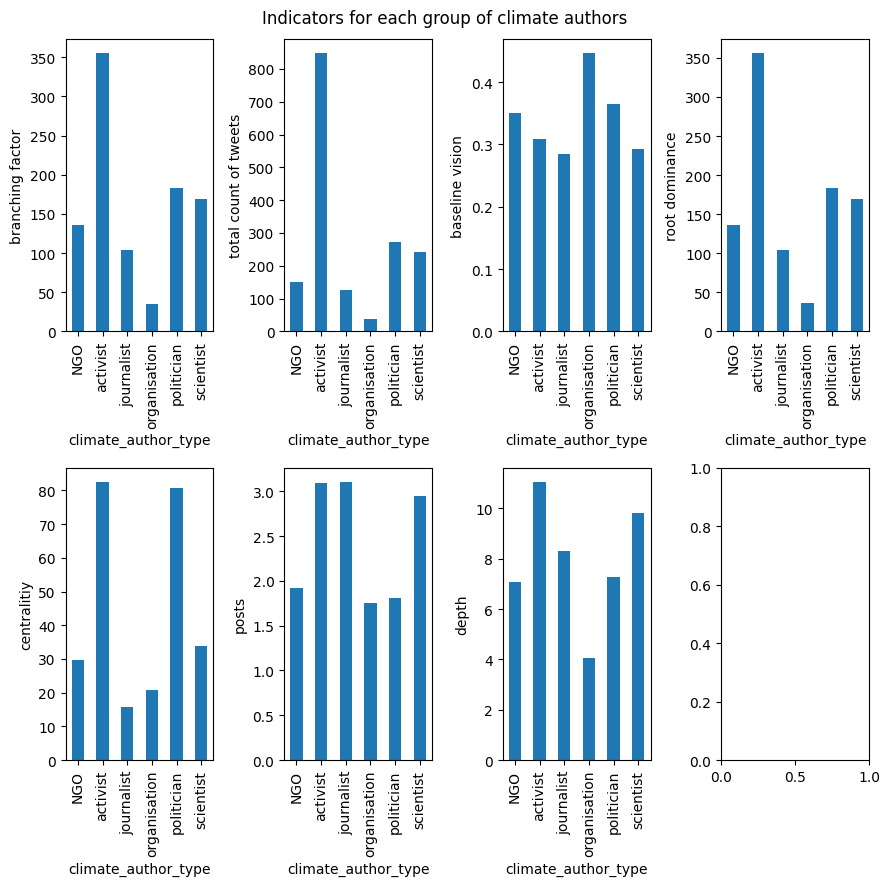

In [30]:
fig, axes = plt.subplots(nrows=2, ncols=4, tight_layout=True, figsize=(9,9))
fig.suptitle("Indicators for each group of climate authors")

ax1 = climate_analysis['branching_factor'].plot.bar(ax=axes[0,0])
ax1.set_ylabel("branching factor")

ax2 = climate_analysis['total_counts'].plot.bar(ax=axes[0,1])
ax2.set_ylabel("total count of tweets")

ax3 = climate_analysis['centrality'].plot.bar(ax=axes[1,0])
ax3.set_ylabel("centralitiy")

ax4 = climate_analysis['n_posts'].plot.bar(ax=axes[1,1])
ax4.set_ylabel("posts");

ax5 = climate_analysis['baseline_vision'].plot.bar(ax=axes[0,2])
ax5.set_ylabel("baseline vision")

ax6 = climate_analysis['depth'].plot.bar(ax=axes[1,2])
ax6.set_ylabel("depth");

ax7 = climate_analysis['root_dominance'].plot.bar(ax=axes[0,3])
ax7.set_ylabel("root dominance")

In [31]:
analysis_flattened.describe()

,author_id,conversation_id,is_climate_author,is_root_author,depth,branching_factor,centrality,baseline_vision,n_posts,root_dominance,total_counts
count,9088.000000,9.088000e+03,9088.0,9088.000000,9088.000000,9088.000000,9088.000000,9088.000000,9088.000000,9088.000000,9088.000000
mean,383.391505,1.454018e+18,1.0,0.869828,8.072623,163.534441,42.252810,0.338378,2.440911,164.479175,164.790493
std,237.245027,1.539065e+17,0.0,0.336511,8.509849,563.514626,175.126455,0.181909,4.720192,563.529108,563.632729
min,1.000000,3.629063e+17,1.0,0.000000,2.000000,5.000000,0.000000,0.012893,1.000000,0.019231,6.000000
25%,317.000000,1.386644e+18,1.0,1.000000,3.000000,10.000000,4.000000,0.142578,1.000000,11.000000,11.000000
50%,375.000000,1.502918e+18,1.0,1.000000,5.000000,24.000000,8.000000,0.500000,1.000000,25.000000,25.000000
75%,401.000000,1.575556e+18,1.0,1.000000,10.000000,85.000000,20.585948,0.500000,2.000000,86.000000,86.000000
max,1619.000000,1.622933e+18,1.0,1.000000,113.000000,13789.000000,6652.180455,0.500000,113.000000,13790.000000,13790.000000


<AxesSubplot:xlabel='x1', ylabel='total_counts'>

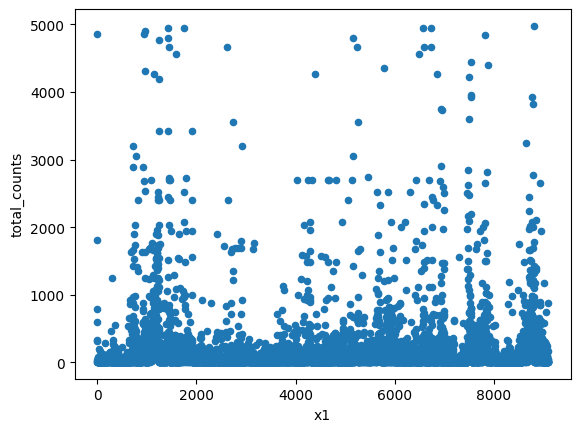

In [32]:
scatter_analysis = analysis_flattened.reset_index()
scatter_analysis = scatter_analysis[scatter_analysis.total_counts > 1]
scatter_analysis = scatter_analysis.drop(scatter_analysis[scatter_analysis['total_counts']>5000].index)
scatter_analysis['x1'] = scatter_analysis.index
scatter_analysis = scatter_analysis.sort_values('total_counts', ascending=True)
scatter_analysis
scatter_analysis.plot.scatter(x='x1', y="total_counts")

<AxesSubplot:xlabel='total_counts', ylabel='baseline_vision'>

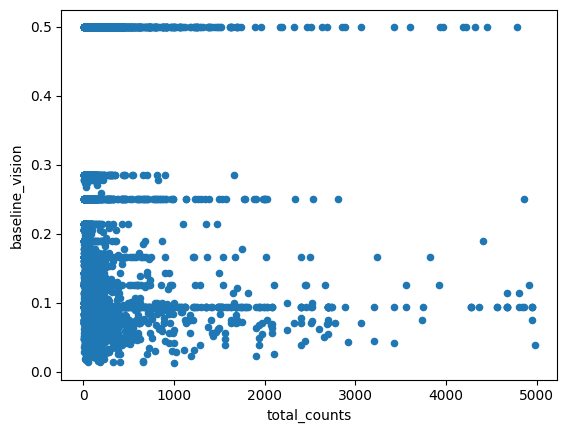

In [33]:
std = scatter_analysis['baseline_vision']
scatter_analysis.plot.scatter(x='total_counts', y= 'baseline_vision')

<AxesSubplot:xlabel='x1', ylabel='branching_factor'>

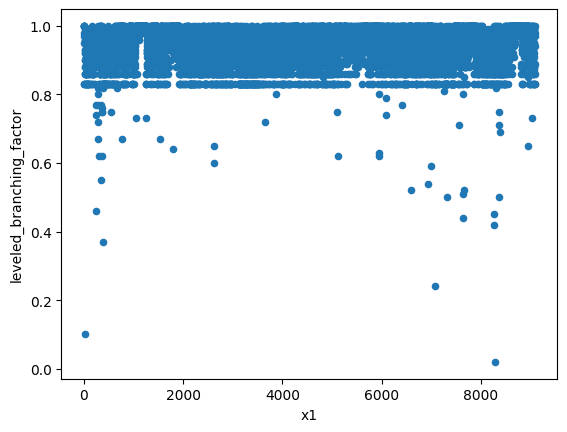

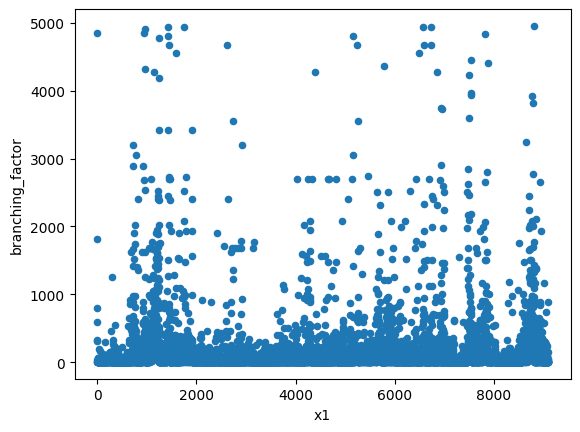

In [34]:
scatter_analysis['leveled_branching_factor']= (scatter_analysis["branching_factor"]/scatter_analysis["total_counts"]).round(2)
scatter_analysis.plot.scatter(x='x1', y="leveled_branching_factor")
scatter_analysis.plot.scatter(x='x1', y="branching_factor")
#Teilen durch total_counts hilft gegen ausreißer

In [35]:
scatter_analysis_case_study = scatter_analysis[scatter_analysis["leveled_branching_factor"] < 0.75]
scatter_analysis_case_study
print(scatter_analysis["leveled_branching_factor"].mean())


0.9419391467313416


<AxesSubplot:xlabel='x1', ylabel='leveled_depth'>

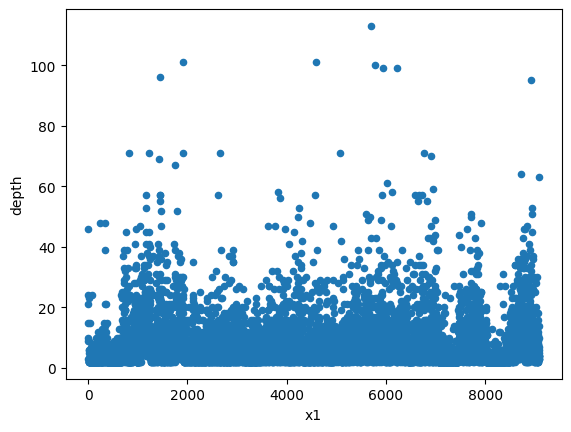

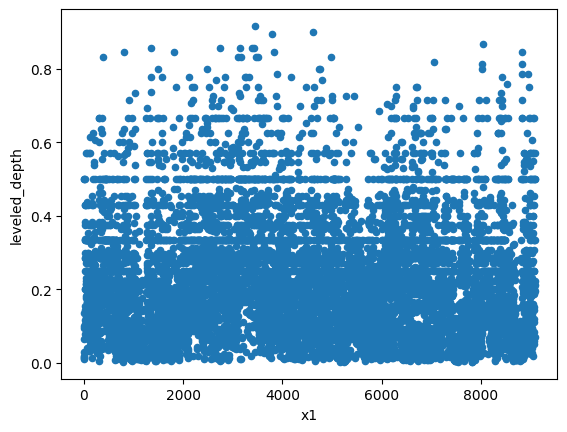

In [36]:
scatter_analysis.plot.scatter(x='x1', y="depth")
scatter_analysis['leveled_depth']= (scatter_analysis["depth"]/scatter_analysis["total_counts"])
scatter_analysis.plot.scatter(x='x1', y="leveled_depth")

<AxesSubplot:xlabel='x1', ylabel='leveled_centrality'>

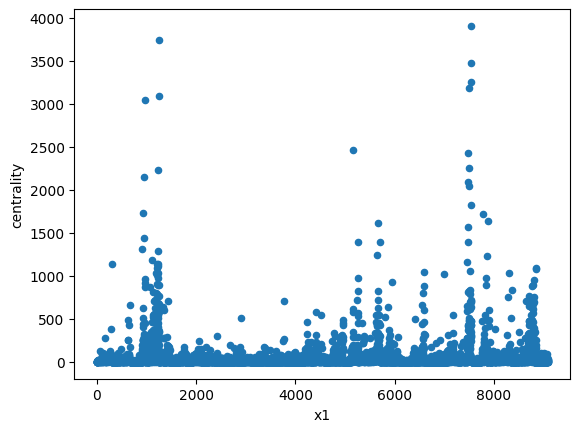

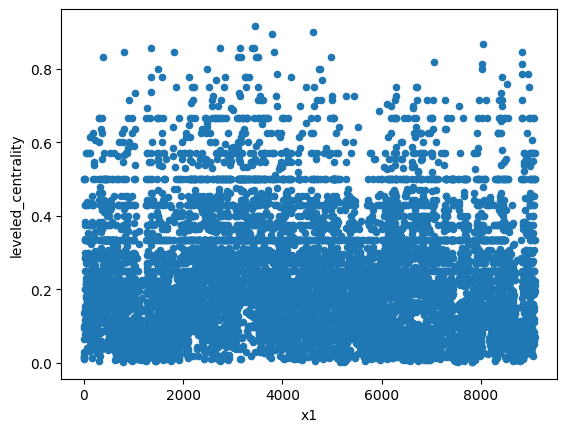

In [37]:
scatter_analysis.plot.scatter(x='x1', y="centrality")
scatter_analysis['leveled_centrality']= (scatter_analysis["depth"]/scatter_analysis["total_counts"])
scatter_analysis.plot.scatter(x='x1', y="leveled_centrality")

<AxesSubplot:xlabel='x1', ylabel='leveled_baseline_vision'>

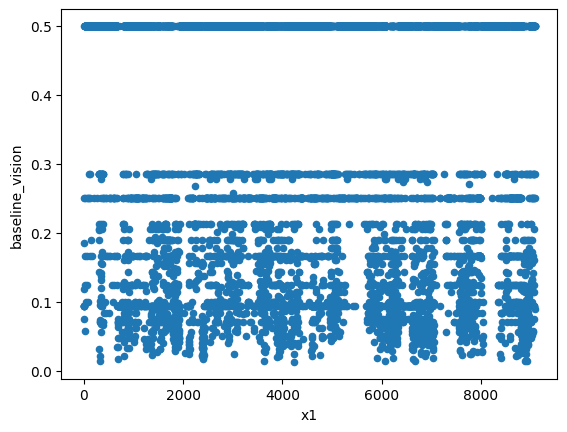

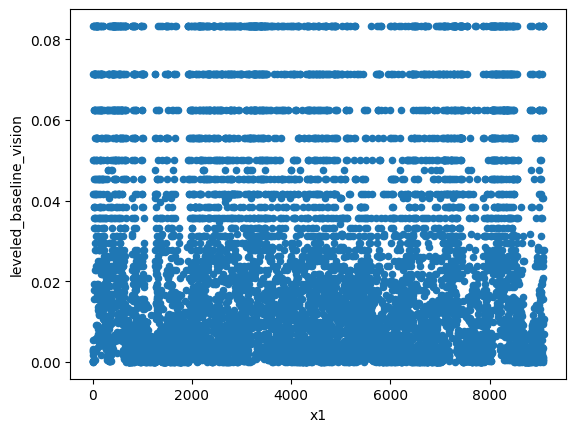

In [38]:
scatter_analysis.plot.scatter(x='x1', y="baseline_vision")
scatter_analysis['leveled_baseline_vision']= (scatter_analysis["baseline_vision"]/scatter_analysis["total_counts"])
scatter_analysis.plot.scatter(x='x1', y="leveled_baseline_vision")
#Macht es hier Sinn durch die Anzahl der Tweets in der Konversation zu teilen?

<AxesSubplot:xlabel='x1', ylabel='leveled_posts'>

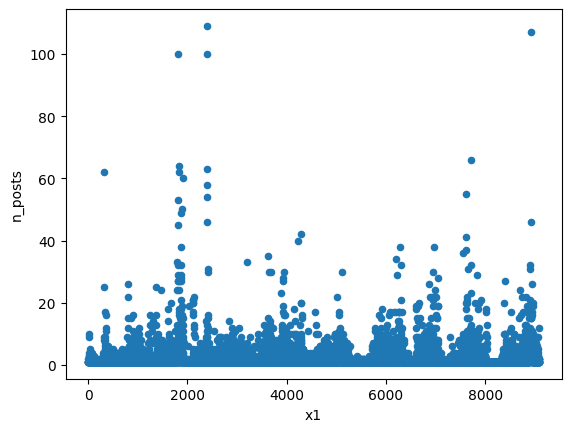

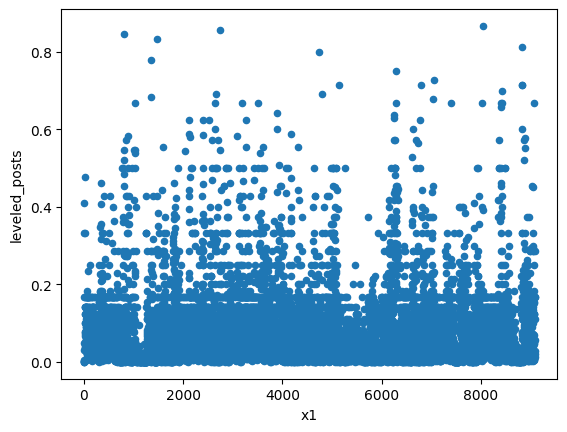

In [39]:
scatter_analysis.plot.scatter(x='x1', y="n_posts")
scatter_analysis['leveled_posts']= (scatter_analysis["n_posts"]/scatter_analysis["total_counts"])
scatter_analysis.plot.scatter(x='x1', y="leveled_posts")

<AxesSubplot:xlabel='x1', ylabel='leveled_dominance'>

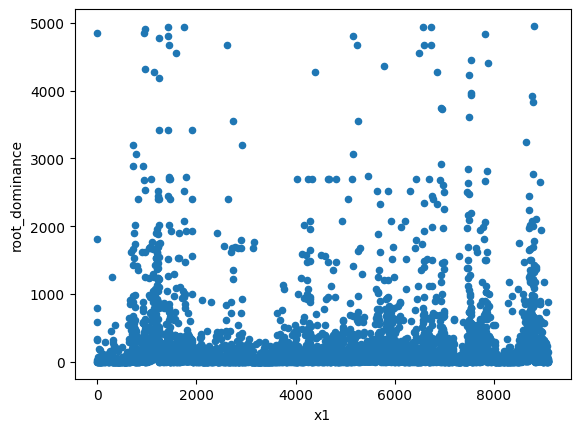

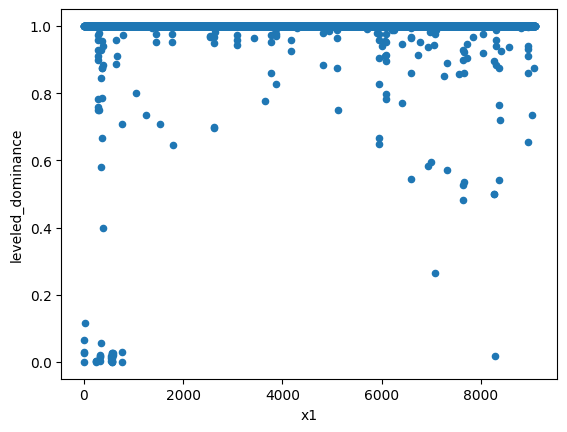

In [40]:
scatter_analysis.plot.scatter(x='x1', y="root_dominance")
scatter_analysis['leveled_dominance']= (scatter_analysis["root_dominance"]/scatter_analysis["total_counts"])
scatter_analysis.plot.scatter(x='x1', y="leveled_dominance")

In [41]:
leveled_scatter = scatter_analysis.groupby('climate_author_type').mean()
leveled_scatter.head()

,index,author_id,conversation_id,is_climate_author,is_root_author,depth,branching_factor,centrality,baseline_vision,n_posts,root_dominance,total_counts,x1,leveled_branching_factor,leveled_depth,leveled_centrality,leveled_baseline_vision,leveled_posts,leveled_dominance
climate_author_type,,,,,,,,,,,,,,,,,,,
NGO,3532.929771,310.992366,1.443481e+18,1.0,0.887532,7.057506,132.414249,29.738775,0.349976,1.923155,133.274323,133.456489,3514.745547,0.931842,0.251400,0.251400,0.027568,0.100391,0.991531
activist,1953.722180,310.569455,1.440396e+18,1.0,0.817345,10.877206,293.557943,77.965777,0.309807,3.096700,294.486770,294.891021,1942.174213,0.960683,0.173680,0.173680,0.013845,0.072277,0.994835
journalist,4104.990664,390.545643,1.449929e+18,1.0,0.869295,8.231328,91.379668,15.635078,0.285259,3.104772,92.379668,92.522822,4088.647303,0.943859,0.259985,0.259985,0.018914,0.113898,0.999093
organisation,5134.008264,323.090909,1.447653e+18,1.0,0.977461,4.037566,34.734035,20.843773,0.446987,1.758077,35.674052,36.110443,5105.515402,0.915214,0.237247,0.237247,0.037042,0.098218,0.993023
politician,5179.927844,398.578098,1.431114e+18,1.0,0.910017,7.219864,173.339559,80.609047,0.365079,1.792020,174.339559,174.353141,5157.058574,0.944423,0.216963,0.216963,0.021618,0.085483,0.999393


In [42]:
leveled_analysis = scatter_analysis.groupby('climate_author_type').mean()
leveled_analysis

,index,author_id,conversation_id,is_climate_author,is_root_author,depth,branching_factor,centrality,baseline_vision,n_posts,root_dominance,total_counts,x1,leveled_branching_factor,leveled_depth,leveled_centrality,leveled_baseline_vision,leveled_posts,leveled_dominance
climate_author_type,,,,,,,,,,,,,,,,,,,
NGO,3532.929771,310.992366,1.443481e+18,1.0,0.887532,7.057506,132.414249,29.738775,0.349976,1.923155,133.274323,133.456489,3514.745547,0.931842,0.251400,0.251400,0.027568,0.100391,0.991531
activist,1953.722180,310.569455,1.440396e+18,1.0,0.817345,10.877206,293.557943,77.965777,0.309807,3.096700,294.486770,294.891021,1942.174213,0.960683,0.173680,0.173680,0.013845,0.072277,0.994835
journalist,4104.990664,390.545643,1.449929e+18,1.0,0.869295,8.231328,91.379668,15.635078,0.285259,3.104772,92.379668,92.522822,4088.647303,0.943859,0.259985,0.259985,0.018914,0.113898,0.999093
organisation,5134.008264,323.090909,1.447653e+18,1.0,0.977461,4.037566,34.734035,20.843773,0.446987,1.758077,35.674052,36.110443,5105.515402,0.915214,0.237247,0.237247,0.037042,0.098218,0.993023
politician,5179.927844,398.578098,1.431114e+18,1.0,0.910017,7.219864,173.339559,80.609047,0.365079,1.792020,174.339559,174.353141,5157.058574,0.944423,0.216963,0.216963,0.021618,0.085483,0.999393
scientist,6446.628326,508.677682,1.486291e+18,1.0,0.807725,9.763519,159.027897,33.783897,0.292753,2.905150,160.004411,160.523605,6418.904292,0.953189,0.212541,0.212541,0.014893,0.082883,0.994287


Text(0, 0.5, 'depth')

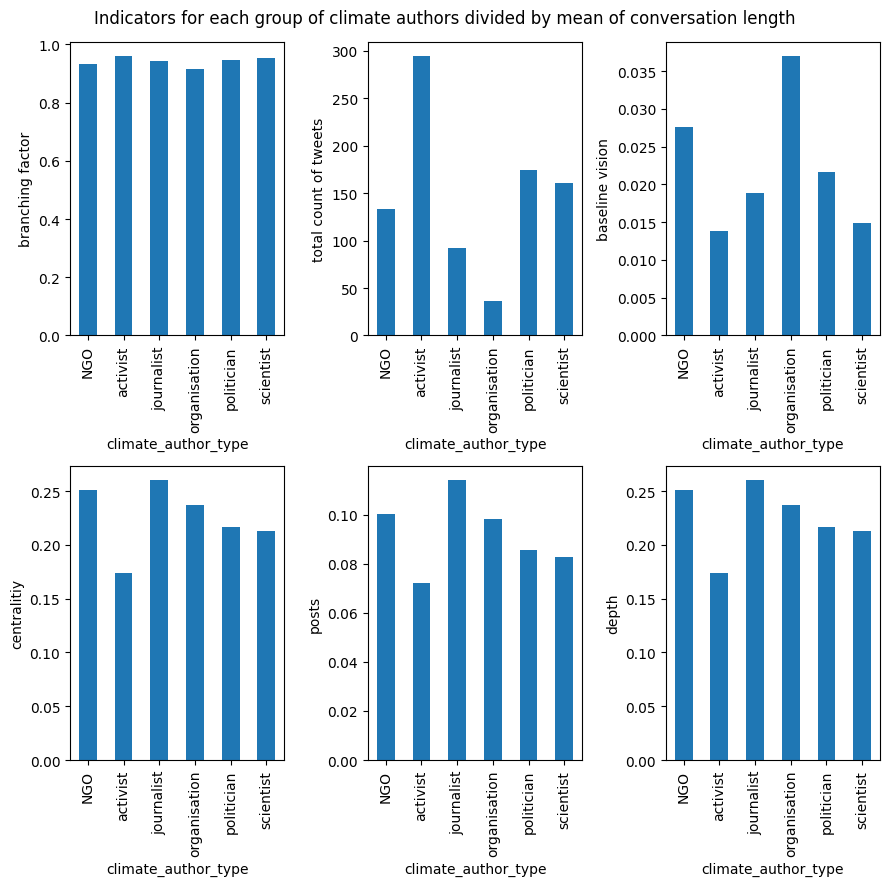

In [43]:
fig, axes = plt.subplots(nrows=2, ncols=3, tight_layout=True, figsize=(9,9))
fig.suptitle("Indicators for each group of climate authors divided by mean of conversation length")

ax1 = leveled_analysis['leveled_branching_factor'].plot.bar(ax=axes[0,0])
ax1.set_ylabel("branching factor")

ax2 = leveled_analysis['total_counts'].plot.bar(ax=axes[0,1])
ax2.set_ylabel("total count of tweets")

ax3 = leveled_analysis['leveled_centrality'].plot.bar(ax=axes[1,0])
ax3.set_ylabel("centralitiy")

ax4 = leveled_analysis['leveled_posts'].plot.bar(ax=axes[1,1])
ax4.set_ylabel("posts");

ax5 = leveled_analysis['leveled_baseline_vision'].plot.bar(ax=axes[0,2])
ax5.set_ylabel("baseline vision")

ax6 = leveled_analysis['leveled_depth'].plot.bar(ax=axes[1,2])
ax6.set_ylabel("depth")

#ax6 = leveled_analysis['leveled_dominance'].plot.bar(ax=axes[0,3])
#ax6.set_ylabel("dominance")

In [44]:
activist_analysis = scatter_analysis[scatter_analysis['total_counts']>10000]
activist_analysis

,index,author_id,conversation_id,screen_name,climate_author_type,is_climate_author,is_root_author,depth,branching_factor,centrality,...,n_posts,root_dominance,total_counts,x1,leveled_branching_factor,leveled_depth,leveled_centrality,leveled_baseline_vision,leveled_posts,leveled_dominance


In [45]:
NGO_df = analysis_flattened[analysis_flattened["climate_author_type"]=='NGO']
cols = ['depth', 'branching_factor', 'centrality', 'baseline_vision','n_posts', 'total_counts']
for col in cols:
    print("NGO variance for " + col + ": " +str(NGO_df[col].var()))

NGO variance for depth: 52.15188924179241
NGO variance for branching_factor: 169910.77772825048
NGO variance for centrality: 7407.706628124983
NGO variance for baseline_vision: 0.03107098479887916
NGO variance for n_posts: 5.792492732689825
NGO variance for total_counts: 170036.63322927427


In [46]:
organisation_df = analysis_flattened[analysis_flattened["climate_author_type"]=='organisation']
cols = ['depth', 'branching_factor', 'centrality', 'baseline_vision','n_posts', 'total_counts']
for col in cols:
    print("organisation variance for " + col + ": " +str(organisation_df[col].var()))

organisation variance for depth: 13.846708054885523
organisation variance for branching_factor: 11330.115675364219
organisation variance for centrality: 3932.250392731554
organisation variance for baseline_vision: 0.015831419603415796
organisation variance for n_posts: 28.49782005728069
organisation variance for total_counts: 11392.791552510127


In [47]:
activist_df = analysis_flattened[analysis_flattened["climate_author_type"]=='activist']
cols = ['depth', 'branching_factor', 'centrality', 'baseline_vision','n_posts', 'total_counts']
for col in cols:
    print("activist variance for " + col + ": " +str(activist_df[col].var()))

activist variance for depth: 116.4303398722495
activist variance for branching_factor: 1098200.6833767123
activist variance for centrality: 93653.76810971729
activist variance for baseline_vision: 0.034996840537383965
activist variance for n_posts: 40.44865349567081
activist variance for total_counts: 1098149.276941441


In [48]:
politician_df = analysis_flattened[analysis_flattened["climate_author_type"]=='politician']
cols = ['depth', 'branching_factor', 'centrality', 'baseline_vision','n_posts', 'total_counts']
for col in cols:
    print("politician variance for " + col + ": " +str(politician_df[col].var()))

politician variance for depth: 58.518200572159685
politician variance for branching_factor: 308609.9771682408
politician variance for centrality: 85046.90083958698
politician variance for baseline_vision: 0.028848613796278216
politician variance for n_posts: 4.571998677419819
politician variance for total_counts: 308609.2782191171


In [49]:
scientist_df = analysis_flattened[analysis_flattened["climate_author_type"]=='scientist']
cols = ['depth', 'branching_factor', 'centrality', 'baseline_vision','n_posts', 'total_counts']
for col in cols:
    print("scientist variance for " + col + ": " +str(scientist_df[col].var()))

scientist variance for depth: 92.59470559694351
scientist variance for branching_factor: 229117.05590111847
scientist variance for centrality: 12382.620480673593
scientist variance for baseline_vision: 0.03515542433912532
scientist variance for n_posts: 31.008630502117267
scientist variance for total_counts: 229473.24878306154
